In [1]:
import pandas as pd
import os
from PIL import Image
from tqdm import tqdm

In [2]:
project_path = r'C:\Users\lesca\Documents\Projet\mai25_bds_extraction'
data_path = os.path.join(project_path, 'data')
output_base = os.path.join(data_path, 'converted')
extracted_data_path = os.path.join(data_path, 'extracted')

In [3]:
df_documents = pd.read_parquet(os.path.join(extracted_data_path, "df_documents.parquet"), engine="fastparquet")

In [4]:
df_documents['rvl_image_path'][0]

'raw/RVL-CDIP/images/imagesa/a/a/a/aaa06d00/50486482-6482.tif'

In [ ]:
# Créer une copie allégée avec seulement les colonnes souhaitées
df_cleaned = df_documents[["rvl_image_path", "label", "data_set"]].copy()
# Supprimer le "raw/" au début de rvl_image_path
df_cleaned["rvl_image_path"] = df_cleaned["rvl_image_path"].str.replace("^raw/", "", regex=True)

In [ ]:
tif_paths = df_documents[df_documents["rvl_image_path"].str.endswith(".tif")]["rvl_image_path"]

for relative_path in tqdm(tif_paths, desc="Conversion des images"):

    # Chemin complet de l'image source
    input_path = os.path.join(data_path, relative_path)

    # Supprimer "raw/" du chemin relatif pour l'image convertie
    # → garde tout ce qu'il y a après "raw/"
    if relative_path.startswith("raw/"):
        cleaned_relative_path = relative_path[len("raw/"):]
    else:
        cleaned_relative_path = relative_path

    # Remplacer l'extension .tif par .jpg
    output_relative_path = os.path.splitext(cleaned_relative_path)[0] + ".jpg"
    output_path = os.path.join(output_base, output_relative_path)

    # Crée les dossiers nécessaires
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Conversion et enregistrement
    try:
        with Image.open(input_path) as img:
            img = img.convert("RGB")
            img.save(output_path, "JPEG")
    except Exception as e:
        print(f"❌ Erreur lors de la conversion de {input_path} : {e}")

Conversion des images:   0%|          | 0/400000 [00:00<?, ?it/s]

In [ ]:
from PIL import Image

input_path = r"C:\Users\lesca\Documents\Projet\mai25_bds_extraction\data\raw\RVL-CDIP\images\imagesa\a\a\a\aaa06d00\50486482-6482.tif"
try:
    with Image.open(input_path) as img:
        print(f"Taille image : {img.size}, format : {img.format}")
        img = img.convert("RGB")
        print("Conversion OK")
except Exception as e:
    print(f"Erreur : {e}")

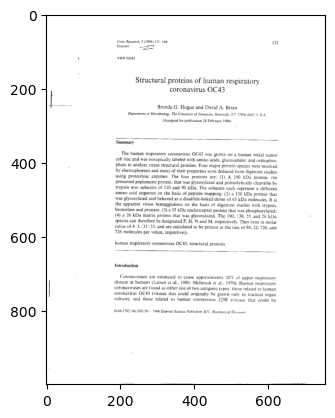

In [15]:
import cv2
from PIL import Image, UnidentifiedImageError
from PIL.TiffTags import TAGS
import matplotlib.pyplot

relative_path = df_documents['rvl_image_path'][0]
input_path = os.path.join(data_path, relative_path)

img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
matplotlib.pyplot.imshow(img, cmap='gray')